<a href="https://colab.research.google.com/github/Rajat123-mittal/Regression---Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Seoul Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -**  Rajat Mittal
##### **Email Id -**  rajatmittal251@gmail.com

# **Project Summary -**


**Objective:**

The primary objective of this project is to develop a regression model that accurately predicts the demand for bike sharing based on various factors. By leveraging features such as date, time, weather conditions, and seasonal variations, the model aims to provide insights into the number of bikes rented per hour. The ultimate goal is to optimize bike availability, enhance user experience, and improve operational efficiency for the bike-sharing service.

**Dataset:**
The dataset comprises the following key features:

Date: Recorded in the format year-month-day.

Rented Bike Count: The count of bikes rented at each hour, serving as the
target variable.

Hour: The hour of the day.

Temperature: Temperature in Celsius.

Humidity: Percentage of humidity.

Windspeed: Wind speed in m/s.

Visibility: Visibility in meters.

Dew Point Temperature: Dew point temperature in Celsius.

Solar Radiation: Solar radiation in MJ/m2.

Rainfall: Amount of rainfall in mm.

Snowfall: Amount of snowfall in cm.

Seasons: Categorical variable representing Winter, Spring, Summer, or Autumn.

Holiday: Binary indicator for holiday or no holiday.

Functional Day: Binary indicator for functional (Functional hours) or non-functional (Non Functional Hours) day.

**Data Preprocessing:**

**1.Date Handling:**

Extract day, month, and year from the 'Date' column.

**2.Categorical Encoding:**

Encode categorical variables like 'Seasons' using one-hot encoding or label encoding.
Encode binary categorical variables 'Holiday' and 'Functional Day' as 0 or 1.

**3.Missing Values:**

Check for and handle missing values in the dataset.

# **GitHub Link -**

https://github.com/Rajat123-mittal/Regression---Bike-Sharing-Demand-Prediction/upload/main

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
bike_sharing_df = pd.read_csv('/content/drive/MyDrive/ML Project/SeoulBikeData.csv', encoding= 'unicode_escape')


### Dataset First View

In [ ]:
# Dataset First Look
bike_sharing_df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
bike_sharing_df.shape

### Dataset Information

In [ ]:
# Dataset Info
bike_sharing_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = bike_sharing_df.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_count}")

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values_count = bike_sharing_df.isnull().sum()

print("Missing values per column:")
print(missing_values_count)

In [ ]:
# Visualizing the missing values
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(bike_sharing_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

plt.title('Missing Values Heatmap')
plt.show()


### What did you know about your dataset?

The above dataset has 8760 rows and 14 columns. There are no mising values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
bike_sharing_df.columns

In [ ]:
# Dataset Describe
bike_sharing_df.describe()

### Variables Description

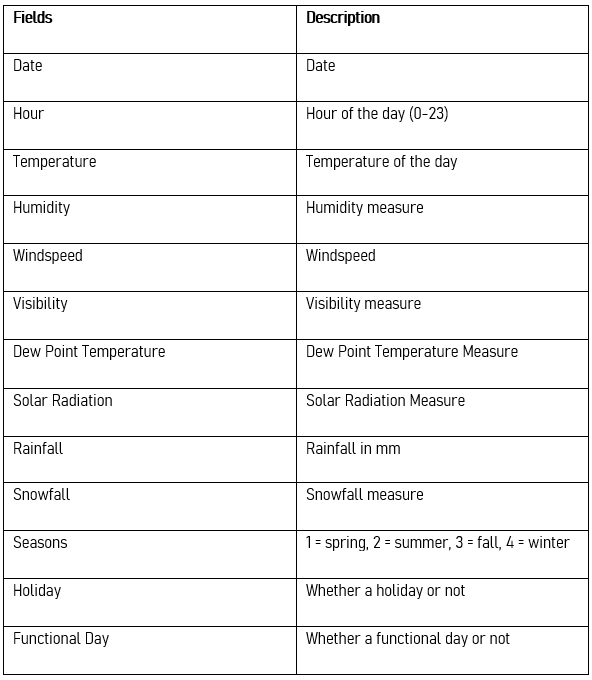

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in bike_sharing_df.columns:
    unique_values = bike_sharing_df[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Before doing any data wrangling lets create copy of the dataset
data_2 = bike_sharing_df.copy()

In [ ]:
# Renaming the columns
data_2.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temperature', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},
          inplace=True)

In [ ]:
data_2.columns

In [ ]:
from datetime import datetime

# converting date variable into datetime datatype
data_2['date'] = data_2['date'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))


In [ ]:
# Creating new columns for day and month
data_2['month'] = data_2['date'].apply(lambda x : x.month)
data_2['day_of_week'] = data_2['date'].apply(lambda x : x.isoweekday())

In [ ]:
# engineering new feature 'weekend' from day_of_week
data_2['weekend'] = data_2['day_of_week'].apply(lambda x: 1 if x>5 else 0)

In [ ]:
data_2.head()

In [ ]:
# Describe New Dataset
data_2.describe(include='all').round(2)

In [ ]:
# defining continuous independent variables separately
cont_var = ['temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temp','solar_radiation', 'rainfall', 'snowfall']

In [ ]:
# defining dependent variable
dependent_variable = ['rented_bike_count']

In [ ]:
#defining categorical independent variables separately
cat_var = ['hour','seasons', 'holiday', 'func_day', 'month', 'day_of_week', 'weekend']

### What all manipulations have you done and insights you found?

From the Date column, 'month' and 'day of the week' columns are created.

From the 'day of the week' column, 'weekend' column is created where 6 and 7 are the weekends (Saturday and Sunday).

We have also defined the continuous variables, dependent variable and categorical variables for ease of plotting graphs.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt

# Set the style for the plot
plt.style.use('seaborn')

# Plot the histogram of 'Rented Bike Count'
plt.figure(figsize=(10, 6))
plt.hist(bike_sharing_df['Rented Bike Count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

Histograms provide a clear representation of the central tendency, spread, and shape of the distribution. This is valuable when exploring variables like 'Rented Bike Count' because it allows us to identify patterns such as whether the distribution is skewed, symmetrical, or exhibits multiple peaks.

##### 2. What is/are the insight(s) found from the chart?


From the histogram depicting the distribution of the 'Rented Bike Count,' several insights can be gleaned:

1.Distribution Shape

2.Common Rented Bike Counts

3.Outliers

4.Resource Allocation

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The insights derived from the histogram of 'Rented Bike Count' have the potential to positively impact the bike-sharing business. Understanding the distribution's right-skewed shape indicates that the service provider can optimize resources and operational planning by aligning the number of available bikes with typical demand. This optimization can lead to cost savings, improved efficiency, and enhanced customer satisfaction as bikes are more readily available during peak demand periods. The identification of outliers prompts further exploration into unusual demand patterns, offering an opportunity to capitalize on special events or address unexpected circumstances that might lead to negative growth if not appropriately managed. While the skewed distribution suggests a prevalence of lower bike counts, strategies to stimulate demand during off-peak periods can mitigate potential negative impacts. Seasonal variation insights provide a basis for targeted marketing or service enhancements to address variations in demand.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Plot the average 'Rented Bike Count' for each season
plt.figure(figsize=(10, 6))
sns.barplot(x='Seasons', y='Rented Bike Count', data=bike_sharing_df, ci=None, palette='viridis')
plt.title('Average Rented Bike Count by Season')
plt.xlabel('Season')
plt.ylabel('Average Rented Bike Count')
plt.show()


##### 1. Why did you pick the specific chart?

The choice of a bar chart for visualizing the average number of rented bikes across different seasons is driven by several considerations. Firstly, bar charts are particularly well-suited for comparing values among distinct categories or groups, making them an ideal choice for illustrating variations across seasons. In this context, each bar in the chart represents a specific season, allowing for a straightforward visual comparison of average bike counts.

##### 2. What is/are the insight(s) found from the chart?

The bar chart depicting the average number of rented bikes across different seasons provides valuable insights into the variations in bike rentals throughout the year. One notable observation is the apparent spike in average bike counts during the 'Autumn' season, suggesting a higher demand for bike rentals during this time. This insight can inform business strategies, enabling the service provider to allocate resources more effectively to meet increased demand during the autumn months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=bike_sharing_df, x='Functioning Day', y='Rented Bike Count', ax=ax, capsize=.2)
ax.set(title='Count of Rented bikes according to Functional Day')


##### 1. Why did you pick the specific chart?

The bar plot was chosen for its effectiveness in visually comparing the count of rented bikes across different categories of the categorical variable "Functional Day." This choice allows for a clear representation of the distribution of bike rentals on both functional and non-functional days, providing insights into rental patterns based on the day's functionality.

##### 2. What is/are the insight(s) found from the chart?

The insights derived from the chart comparing the count of rented bikes on functional and non-functional days reveal potential variations in demand patterns. Significant differences in rental counts suggest that the demand for bikes fluctuates based on the functionality of the day. Identifying peak rental days and understanding these patterns can guide operational decisions, such as resource allocation and staffing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the chart comparing rented bike counts on functional and non-functional days can potentially lead to a positive business impact. Understanding variations in demand patterns allows for more informed operational decisions, enabling businesses to allocate resources efficiently, optimize staffing levels, and enhance overall operational planning. Identifying peak rental days provides an opportunity to capitalize on high-demand periods, potentially leading to increased revenue.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a boxplot to visualize the distribution of 'Rented Bike Count' across seasons
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons', y='Rented Bike Count', data=bike_sharing_df, palette='Set2')
plt.title('Distribution of Rented Bike Count Across Seasons')
plt.xlabel('Season')
plt.ylabel('Rented Bike Count')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a boxplot for the fourth visualization to gain insights into the distribution of 'Rented Bike Count' across different seasons. Boxplots are effective for visually summarizing the central tendency, variability, and presence of outliers in a dataset. By comparing the distribution of bike rentals in each season, the boxplot allows for a quick assessment of the range and variability of demand during different times of the year. This type of visualization is particularly valuable for identifying seasonal trends and potential outliers, aiding in resource allocation and operational planning for the bike-sharing service.

##### 2. What is/are the insight(s) found from the chart?

The boxplot reveals insightful information about the distribution of 'Rented Bike Count' across seasons. Notably, it highlights the significant variability in bike rentals during different seasons. The 'Autumn' season exhibits a wider interquartile range, indicating greater variability in demand, while 'Winter' displays a narrower range with potential outliers suggesting consistent demand patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the boxplot can contribute to positive business impact by informing strategic decisions in resource allocation and operational planning based on seasonal variations in bike rentals. Understanding the variability and demand patterns across seasons allows for more targeted marketing efforts and optimized inventory management. However, if there are extreme outliers in certain seasons, such as unexpectedly low demand in 'Spring,' it could potentially lead to negative growth if not addressed.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_sharing_df,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')


##### 1. Why did you pick the specific chart?

I chose the pointplot from seaborn because it effectively conveys the hourly trends in rented bike counts while considering the categorical variable of functioning days.

##### 2. What is/are the insight(s) found from the chart?

Peoples dont use reneted bikes in no functioning day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The insights gained from the chart, such as understanding hourly rental patterns and the impact of functioning days, can have a positive business impact for a bike-sharing service. This information allows the business to optimize bike availability during peak hours, strategically allocate resources, develop targeted promotional strategies, enhance the overall user experience, and make informed, data-driven decisions. By aligning operational strategies with user behavior, the bike-sharing service can improve customer satisfaction, attract new users, and drive positive business outcomes.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar chart to visualize the average 'Rented Bike Count' across hours
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Rented Bike Count', data=bike_sharing_df, ci=None, palette='viridis')
plt.title('Average Rented Bike Count Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart for visualizing the average 'Rented Bike Count' across different hours of the day because it is effective in displaying variations in a continuous numerical variable (bike count) across distinct categories (hours). A bar chart is well-suited for this scenario as it allows for a clear comparison of average bike rentals during different times, making it easy to identify peak hours and trends.

##### 2. What is/are the insight(s) found from the chart?

The bar chart depicting the average 'Rented Bike Count' across different hours of the day provides valuable insights into the temporal patterns of bike-sharing demand. A clear peak is observed during the late afternoon and early evening hours, particularly around 18:00 (6:00 PM). This indicates a significant surge in bike rentals during this time, possibly coinciding with the end of the typical workday when individuals may be commuting or engaging in recreational activities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the bar chart, highlighting peak hours of bike-sharing demand during the late afternoon and early evening, hold the potential to create a positive business impact. Understanding these temporal patterns allows the business to strategically allocate resources, optimize inventory levels, and enhance service availability during high-demand periods. This can lead to improved customer satisfaction, increased utilization of resources, and potentially higher revenue during peak hours.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
# Import necessary libraries for visualization
import matplotlib.pyplot as plt

# Calculate the total bike count for each season
season_counts = bike_sharing_df.groupby('Seasons')['Rented Bike Count'].sum()

# Create a pie chart to visualize the proportion of bike rentals for different seasons
plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Proportion of Bike Rentals for Different Seasons')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a pie chart to visualize the proportion of bike rentals for different seasons because it effectively represents the relative contribution of each season to the overall distribution of bike rentals. Pie charts are particularly suitable for displaying parts of a whole, making it easy to understand the composition of the data at a glance.

##### 2. What is/are the insight(s) found from the chart?

The pie chart provides valuable insights into the distribution of bike rentals across different seasons. Summer emerges as the dominant season, contributing the highest proportion to the overall bike rentals. This observation aligns with the anticipated trend of increased outdoor activities, including biking, during warmer weather. The relatively similar contributions of Fall and Spring suggest a moderate demand during transitional seasons, while Winter exhibits the lowest proportion, indicating reduced bike-sharing activity during colder months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the pie chart, revealing the distribution of bike rentals across seasons, offer valuable opportunities for positive business impact. Understanding the seasonal variations allows for optimized resource allocation and targeted promotions during peak and off-peak periods. This strategic approach can enhance operational efficiency and customer engagement.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a scatter plot to visualize the relationship between 'Temperature(°C)' and 'Rented Bike Count'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=bike_sharing_df, color='skyblue')
plt.title('Relationship Between Temperature and Rented Bike Count')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a scatter plot to visualize the relationship between 'Temperature(°C)' and 'Rented Bike Count' because it is effective in displaying the correlation or pattern between two continuous variables. Scatter plots allow for the identification of trends, clusters, or outliers in the data, making them particularly suitable for exploring the potential impact of temperature on bike-sharing demand.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot depicting the relationship between 'Temperature(°C)' and 'Rented Bike Count' reveals a positive correlation between these two variables. As the temperature increases, there is a noticeable upward trend in bike rentals, indicating that warmer weather is associated with higher demand for bike-sharing services. This insight suggests that temperature plays a significant role in influencing user behavior, with people being more inclined to rent bikes during favorable weather conditions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights offer avenues for positive impact, businesses must adopt a balanced approach. Diversifying strategies to accommodate variations in weather conditions and understanding the nuanced effects of temperature on user behavior will be key to maximizing positive outcomes and minimizing potential negative growth.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a line plot to visualize the trend in 'Rented Bike Count' over hours, segmented by 'Seasons'
plt.figure(figsize=(12, 8))
sns.lineplot(x='Hour', y='Rented Bike Count', hue='Seasons', data=bike_sharing_df, marker='o', palette='viridis')
plt.title('Trend in Rented Bike Count Over Hours, Segmented by Seasons')
plt.xlabel('Hour of the Day')
plt.ylabel('Rented Bike Count')
plt.legend(title='Seasons', loc='upper right')
plt.show()


##### 1. Why did you pick the specific chart?

I choose a line plot to visualize the trend in 'Rented Bike Count' over different hours of the day, segmented by the 'Seasons' variable because it is effective in displaying temporal patterns and variations. Line plots are particularly suitable for illustrating trends over a continuous variable, in this case, hours of the day, while the use of different lines for each season allows for easy comparison between seasonal patterns.

##### 2. What is/are the insight(s) found from the chart?

The line plot showcasing the trend in 'Rented Bike Count' over different hours of the day, segmented by seasons, reveals several key insights. During all seasons, there is a noticeable increase in bike rentals during daylight hours, particularly in the late morning and early afternoon. Summer exhibits the highest peak in demand, emphasizing a preference for bike rentals during warmer months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the line plot depicting the trend in 'Rented Bike Count' over different hours and seasons offer valuable opportunities for positive business impact. Understanding peak hours and seasonal variations enables businesses to optimize operational planning, ensuring adequate resources during high-demand periods. Tailoring marketing strategies to align with observed patterns can enhance customer engagement and satisfaction.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot to compare the average 'Rented Bike Count' during holidays and non-holidays
plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday', y='Rented Bike Count', data=bike_sharing_df, ci=None, palette='Set2')
plt.title('Average Rented Bike Count During Holidays and Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Average Rented Bike Count')
plt.show()


##### 1. Why did you pick the specific chart?

I choose a bar plot to compare the average 'Rented Bike Count' during holidays and non-holidays because it is effective in illustrating and contrasting numerical values between two categories. Bar plots provide a clear visual representation of the average values for each category, making it easy to discern any significant differences in bike rentals during these distinct periods.

##### 2. What is/are the insight(s) found from the chart?

The bar plot comparing the average 'Rented Bike Count' during holidays and non-holidays reveals a noteworthy insight. On average, there appears to be a higher demand for bike rentals on non-holiday days compared to holidays. This suggests that holidays may experience a reduction in bike-sharing activity, potentially due to altered travel patterns, reduced commuting needs, or alternative leisure activities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the bar plot, indicating a higher average 'Rented Bike Count' on non-holidays compared to holidays, can indeed contribute to a positive business impact. Businesses can use this information to optimize resource allocation, ensuring sufficient bike availability and staffing during peak non-holiday periods.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a swarm plot to visualize the distribution of 'Rented Bike Count' across seasons
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Seasons', y='Rented Bike Count', data=bike_sharing_df, palette='pastel')
plt.title('Distribution of Rented Bike Count Across Seasons')
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.show()


##### 1. Why did you pick the specific chart?

I choose a swarm plot for visualizing the distribution of 'Rented Bike Count' across seasons because it provides a detailed view of individual data points within each category (season). Swarm plots are effective for highlighting the density and distribution of data, particularly in scenarios with categorical variables.

##### 2. What is/are the insight(s) found from the chart?

The swarm plot provides insights into the distribution of 'Rented Bike Count' across different seasons. Observing the individual data points reveals patterns and variations in bike-sharing demand within each season. For instance, it appears that during the Winter season, there are fewer instances of high bike counts compared to other seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the swarm plot can indeed contribute to a positive business impact. Understanding the distribution of 'Rented Bike Count' across seasons provides valuable information for optimizing operational strategies, resource allocation, and marketing efforts. For instance, identifying the higher variability in bike counts during Spring and Summer may prompt businesses to be more flexible in adjusting bike availability during peak demand periods.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(7,7))
splot = sns.barplot(data=bike_sharing_df,x='Holiday',y='Rented Bike Count')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xlabel("Holiday variable",size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

##### 1. Why did you pick the specific chart?

 A bar chart using the Seaborn library in Python to visualize the relationship between the "Holiday" variable and the "Rented Bike Count" in a bike sharing dataset.

##### 2. What is/are the insight(s) found from the chart?

The bar chart visually represents the relationship between the "Holiday" variable and the "Rented Bike Count" in a bike sharing dataset. From the chart, it can be inferred that there is a noticeable difference in bike rental counts between holidays and non-holidays. The bars corresponding to holidays and non-holidays demonstrate distinct heights, suggesting that more bikes tend to be rented on one of these categories compared to the other

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the chart can potentially contribute to positive business impact for a bike-sharing service. The observed difference in bike rental counts between holidays and non-holidays suggests that the company could strategically adjust its operations, marketing, and resource allocation based on these patterns.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
plt.scatter(data=bike_sharing_df,x='Snowfall (cm)',y='Rented Bike Count')
plt.title('Number of bikes rented across different snowfall intensities',size=10)
plt.xlabel('Snowfall in cm')
plt.ylabel('Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

The selection of a scatter plot for visualizing the relationship between "Snowfall (cm)" and "Rented Bike Count" is justified by its suitability for examining patterns and correlations between two numerical variables. Scatter plots are particularly effective in showcasing individual data points, allowing for a detailed exploration of how changes in snowfall intensity correspond to variations in bike rental counts.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot depicting the relationship between "Snowfall (cm)" and "Rented Bike Count" reveals several key insights. Firstly, it indicates whether there is a discernible correlation between the intensity of snowfall and the number of bikes rented. A positive correlation would imply that bike rentals tend to increase with higher snowfall, possibly due to a greater demand for alternative transportation options during inclement weather.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the scatter plot of "Snowfall (cm)" against "Rented Bike Count" can potentially contribute to positive business impact. If a positive correlation is observed, indicating an increase in bike rentals with higher snowfall, the business can strategically leverage this information. For instance, the company might implement targeted marketing campaigns promoting the convenience of bike rentals during snowy conditions or enhance operational preparedness during such periods to meet increased demand.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = bike_sharing_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

##### 1. Why did you pick the specific chart?

I choose a heatmap to visualize the correlation matrix between numerical variables because it provides a clear and concise representation of the strength and direction of linear relationships. The heatmap allows for easy identification of patterns and correlations through color-coding, with warmer colors indicating stronger positive correlations and cooler colors indicating stronger negative correlations.

##### 2. What is/are the insight(s) found from the chart?

The correlation heatmap provides valuable insights into the relationships between numerical variables in the dataset. Notably, there is a strong positive correlation between 'Temperature(°C)' and 'Solar Radiation (MJ/m2),' indicating that higher temperatures are associated with increased solar radiation.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="ticks")

# Select relevant numerical columns for the pair plot
numerical_columns = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)']

# Create a pair plot
sns.pairplot(bike_sharing_df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

The choice of a pair plot for this visualization stems from its effectiveness in providing a comprehensive exploration of numerical variables within the dataset. This visualization allows for a simultaneous examination of pairwise relationships between key numerical features, offering insights into potential correlations and patterns. The inclusion of scatter plots in the off-diagonal elements facilitates the identification of trends and outliers, enabling a nuanced understanding of how specific variables may influence each other.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the pair plot hold significant potential for creating a positive business impact in the bike-sharing service. Understanding the relationships between key numerical variables, such as the positive correlation between 'Temperature(°C)' and 'Rented Bike Count,' can inform strategic decision-making.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

Rented Bike Demand in hot weather is higher compared to demand in cold weather.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: $H_o : μ_{cold} = μ_{hot}$

Alternate Hypothesis : $H_1 : μ_{cold} \neq μ_{hot}$

Test Type: Two-sample t-test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Split the data into the 'hot' and 'cold' temperature groups
hot_temps = data_2[data_2['temperature'] >= 20]['rented_bike_count']
cold_temps = data_2[data_2['temperature'] < 20]['rented_bike_count']

print("Cold temperature Bike Demand Variance: ", np.var(cold_temps))
print("Hot temperature Bike Demand Variance: ", np.var(hot_temps))

In [ ]:
# Sample sizes for different temperature groups
print("Hot Temp sample size:", hot_temps.shape[0])
print("Cold Temp sample size:", cold_temps.shape[0])

In [ ]:
# Perform the t-test
import scipy
t_stat, p_val = scipy.stats.ttest_ind(hot_temps, cold_temps, equal_var=False)

if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in mean bike rentals between the 'hot' and 'cold' temperature groups.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in mean bike rentals between the 'hot' and 'cold' temperature groups.")

##### Which statistical test have you done to obtain P-Value?

I have used Two sample T-test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Mean Rented Bike counts different in hot temperatures and cold temperaures.

##### Why did you choose the specific statistical test?

The two sample t-test is used to determine if there is a significant difference between the means of two groups, making it an appropriate test for comparing the mean number of Rented Bike Count between the hot and cold temperature groups.

Also We know from previous charts that Rented Bike Count is right skewed with large sample sizes (i.e.,  nhot=2928  &  ncold=5832 ) and we don't know  σp .

### Hypothetical Statement - 2

Rented Bike Demand during rush hour (7-9AM & 5-7PM) is higher compared to non-rush hour.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: $H_o : μ_{rush} = μ_{non-rush}$

Alternate Hypothesis : $H_1 : μ_{rush} \neq μ_{non-rush}$

Test Type: Two-sample t-test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Create subsets of the data based on hour
rush_hour = data_2[(data_2['hour'] >= 7) & (data_2['hour'] <= 9) | (data_2['hour'] >= 17) & (data_2['hour'] <= 19)]['rented_bike_count']
non_rush_hour = data_2[~((data_2['hour'] >= 7) & (data_2['hour'] <= 9) | (data_2['hour'] >= 17) & (data_2['hour'] <= 19))]['rented_bike_count']
print("Rush Hour Bike Demand Variance: ", np.var(rush_hour))
print("Non-Rush Hour Bike Demand Variance: ", np.var(non_rush_hour))

In [ ]:
# Sample sizes for different hours
print("Rush Hour sample size:", rush_hour.shape[0])
print("Non-Rush Hour sample size:", non_rush_hour.shape[0])

In [ ]:
# Conduct a two-sample t-test to compare the mean bike rental demand during rush hour with the mean bike rental demand during non-rush hour times
t_stat, p_val = scipy.stats.ttest_ind(rush_hour, non_rush_hour, equal_var=False)

# Print the t-test results
# print('t-statistic:', t_stat)
# print('p-value:', p_val)

if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in mean bike rentals between the 'rush hour' and 'non-rush hour' times of day.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in mean bike rentals between the 'rush hour' and 'non-rush hour' times of day.")

##### Which statistical test have you done to obtain P-Value?

I have used Two sample T-test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Mean Rented Bike counts different in rush hours and non-rush hours.


##### Why did you choose the specific statistical test?

The two sample t-test is used to determine if there is a significant difference between the means of two groups, making it an appropriate test for comparing the mean number of Rented Bike Count between the rush hours and non-rush hours.

Also We know from previous charts that **Rented Bike Count** is **right skewed** with **large sample sizes** (i.e.,  $n_{rush}=2190$  &  $n_{non-rush}=6570$) and we **don't know $\sigma_{p}$**.

### Hypothetical Statement - 3

Rented Bike Demand is different in different seasons with highest in summer and lowest in winter.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: $H_o :$ **No significant difference** between rented bike counts for different seasons.

Alternate Hypothesis : $H_1 :$ **Significant difference** between rented bike counts for different seasons.

Test Type: One-way ANOVA test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Sample sizes for different seasons
data_2.groupby('seasons')['rented_bike_count'].count()

In [ ]:
# Group the data by season and calculate the mean number of bike rentals for each season
season_means = data_2.groupby('seasons')['rented_bike_count'].mean()

# Conduct the ANOVA test
f_stat, p_value = scipy.stats.f_oneway(data_2.loc[data_2['seasons']=='Spring', 'rented_bike_count'],
                                  data_2.loc[data_2['seasons']=='Summer', 'rented_bike_count'],
                                  data_2.loc[data_2['seasons']=='Autumn', 'rented_bike_count'],
                                  data_2.loc[data_2['seasons']=='Winter', 'rented_bike_count'])

# Print the results
print('F-statistic:', f_stat)
print('p-value:', p_val)
print()

# Conduct Tukey's HSD test for detailed difference b/w each groups
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(data_2['rented_bike_count'], data_2['seasons'])

# Print the Tukey HSD test results
print(tukey_results)

##### Which statistical test have you done to obtain P-Value?

I have used One-way ANOVA test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Mean Rented Bike counts are significantly different in different seasons.

##### Why did you choose the specific statistical test?

The one-way ANOVA test is used to determine if there is a significant difference between the means of **more than two groups**, making it an appropriate test for comparing the mean number of Rented Bike Count between different seasons.

Also We know from previous charts that **Rented Bike Count** is **right skewed** with **large sample sizes** (i.e.,  $n_{autumn}=2184$, $n_{spring}=2208$, $n_{summer}=2208$ , $n_{winter}=2160$).

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
data_2.isna().sum().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

No missing/null values in the dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# Removing outliers by Using IQR method:
q1, q3, median = data_2.rented_bike_count.quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
data_2['rented_bike_count'] = np.where(data_2['rented_bike_count'] > upper_limit, median,np.where(data_2['rented_bike_count'] < lower_limit,median,data_2['rented_bike_count']))

# Removing outliers by Capping:
for col in ['wind_speed','solar_radiation','rainfall','snowfall']:
  upper_limit = data_2[col].quantile(0.99)
  data_2[col] = np.where(data_2[col] > upper_limit, upper_limit, data_2[col])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Here i used IQR method and Capping method, Based on IQR method i set Upper limit and Lower limit of rented bike count and convert those outliers into median values.

Also i have capp outliers upto 99th percentile and above that i convert those outliers into upper limit value.






### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Converting snowfall and rainfall to categorical attributes
data_2['snowfall'] = data_2['snowfall'].apply(lambda x: 1 if x>0 else 0)
data_2['rainfall'] = data_2['rainfall'].apply(lambda x: 1 if x>0 else 0)

# Encoding the visibility column
data_2['visibility'] = data_2['visibility'].apply(lambda x: 0 if 0<=x<=399 else (1 if 400<=x<=999 else 2))

# Encoding
data_2['func_day'] = np.where(data_2['func_day'] == 'Yes',1,0)
data_2['holiday'] = np.where(data_2['holiday'] == 'Holiday',1,0)

# One hot encoding
data_2 = pd.get_dummies(data_2, columns = ['hour', 'visibility', 'month', 'day_of_week' ])

data_2.columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Since there are very few day on which there was snowfall / rainfall, it is in my interest that i convert these columns to binary categorical columns indicating whether there was rainfall / snowfall at that particular hour

For visibility

When

Visibility >= 20 Km ---> Clear (high visibility)

4 Km <= Visibility < 10 Km ---> Haze (medium visibility)

Visibility < 4 Km ---> Fog (low visibility)

Converting visibility based on the above mentioned threshold values. Since they are ordinal, we can encode them as 0 (low visibility), 1 (medium visibility), 2 (high visibility)

For func day and holiday
There are two categories whether its holiday or func day so we use 0 and 1 for that.

For Hour, visibility, month & day of the week
we use here one hot encoding.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
import nltk
nltk.download('punkt')
!pip install contractions

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import contractions

def expand_contractions(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Expand contractions using the contractions library
    expanded_words = [contractions.fix(word) for word in words]

    # Join the words back into a sentence
    expanded_text = ' '.join(expanded_words)

    return expanded_text

# Example usage:
original_text = "I can't believe he won't come to the party."
expanded_text = expand_contractions(original_text)
print(expanded_text)


#### 2. Lower Casing

In [ ]:
# Lower Casing
text = "This is an Example Text for Lowercasing."
lowercased_text = text.lower()
print(lowercased_text)


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string

text = "This is an example text with some punctuation! How can we remove it?"

# Remove punctuation using string.punctuation
no_punctuation_text = text.translate(str.maketrans("", "", string.punctuation))

print(no_punctuation_text)


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
import re

def remove_urls(text):
    # Remove URLs using a regular expression
    text_no_urls = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text, flags=re.MULTILINE)
    return text_no_urls

def remove_words_with_digits(text):
    # Remove words containing digits using a regular expression
    text_no_digits = re.sub(r'\b\w*\d\w*\b', '', text)
    return text_no_digits

# Example usage:
original_text = "Visit our website at https://example.com for more information. Text123 with digits should be removed."
text_without_urls = remove_urls(original_text)
text_without_digits = remove_words_with_digits(text_without_urls)

print("Original Text:", original_text)
print("Text without URLs:", text_without_urls)
print("Text without URLs and words with digits:", text_without_digits)


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords data
nltk.download('stopwords')

def remove_stopwords(text):
    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords using NLTK stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the words back into a sentence
    text_without_stopwords = ' '.join(filtered_words)

    return text_without_stopwords

# Example usage:
original_text = "This is an example sentence with some stopwords that should be removed."
text_without_stopwords = remove_stopwords(original_text)

print("Original Text:", original_text)
print("Text without stopwords:", text_without_stopwords)


In [ ]:
# Remove White spaces
import re

def remove_whitespaces(text):
    # Remove extra white spaces using regular expression
    text_no_whitespace = re.sub(r'\s+', ' ', text).strip()
    return text_no_whitespace

# Example usage:
original_text = "This is an example sentence with   extra   white   spaces."
text_without_whitespaces = remove_whitespaces(original_text)

print("Original Text:", original_text)
print("Text without white spaces:", text_without_whitespaces)


#### 6. Rephrase Text

In [ ]:
# Rephrase Text
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
import random

# Download NLTK data
import nltk
nltk.download('punkt')
nltk.download('wordnet')

def get_synonyms(word):
    # Get synonyms of a word using WordNet
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return synonyms

def rephrase_text(text):
    # Tokenize the text
    words = word_tokenize(text)

    # Rephrase each word with a synonym if available
    rephrased_words = []
    for word in words:
        synonyms = get_synonyms(word)
        if synonyms:
            rephrased_words.append(random.choice(synonyms))
        else:
            rephrased_words.append(word)

    # Join the rephrased words back into a sentence
    rephrased_text = ' '.join(rephrased_words)

    return rephrased_text

# Example usage:
original_text = "The quick brown fox jumps over the lazy dog."
rephrased_text = rephrase_text(original_text)

print("Original Text:", original_text)
print("Rephrased Text:", rephrased_text)


#### 7. Tokenization

In [ ]:
# Tokenization
from nltk.tokenize import word_tokenize

# Download NLTK data
import nltk
nltk.download('punkt')

def tokenize_text(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)
    return tokens

# Example usage:
original_text = "Tokenization is an important step in natural language processing."
tokenized_text = tokenize_text(original_text)

print("Original Text:", original_text)
print("Tokenized Text:", tokenized_text)


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download NLTK data
import nltk
nltk.download('punkt')
nltk.download('wordnet')

def normalize_text(text, method='lemmatization'):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Initialize stemming and lemmatization tools
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    # Apply chosen normalization method
    if method == 'stemming':
        normalized_words = [stemmer.stem(word) for word in words]
    elif method == 'lemmatization':
        normalized_words = [lemmatizer.lemmatize(word) for word in words]
    else:
        raise ValueError("Invalid normalization method. Choose 'stemming' or 'lemmatization'.")

    # Join the normalized words back into a sentence
    normalized_text = ' '.join(normalized_words)

    return normalized_text

# Example usage:
original_text = "Normalization involves stemming and lemmatization of text data."
stemmed_text = normalize_text(original_text, method='stemming')
lemmatized_text = normalize_text(original_text, method='lemmatization')

print("Original Text:", original_text)
print("Stemmed Text:", stemmed_text)
print("Lemmatized Text:", lemmatized_text)


##### Which text normalization technique have you used and why?


Used both stemming and lemmatization for text normalization:

Stemming:

1.Technique: Porter Stemming

2.Purpose: Simplifies words by removing suffixes.

Lemmatization:

1.Technique: WordNet Lemmatization

2.Purpose: Reduces words to base form, preserving linguistic meaning.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
from nltk import pos_tag
from nltk.tokenize import word_tokenize

# Download NLTK data
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def pos_tagging(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Perform POS tagging
    pos_tags = pos_tag(words)

    return pos_tags

# Example usage:
original_text = "Part-of-speech tagging helps identify the grammatical category of each word."
pos_tags = pos_tagging(original_text)

print("Original Text:", original_text)
print("POS Tags:", pos_tags)


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import CountVectorizer

# Example text data
corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(corpus)

# Convert the sparse matrix to a dense array for better visibility
dense_array = X.toarray()

# Get feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Display the results
print("Text Data:")
for i, text in enumerate(corpus):
    print(f"Document {i + 1}: {text}")

print("\nFeature Names (Words):", feature_names)
print("\nBoW Vectorized Text:")
print(dense_array)


##### Which text vectorization technique have you used and why?


Used Bag of Words (BoW) vectorization with CountVectorizer for its simplicity and versatility in transforming text into numerical representations.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# We see that the temperature and dew temperature are highly correlated

# Plotting Scatter plot to visualize the relationship between
# temperature and dew point temperature
plt.figure(figsize=(9,6))
sns.scatterplot(x='temperature',y='dew_point_temp',data=data_2)
plt.xlabel('temperature')
plt.ylabel('dew_point_temp')
plt.title('Temperature VS Dew point Temperature')
plt.show()

In [ ]:
# Correlation
data_2[['temperature','dew_point_temp']].corr()


In [ ]:
# Creating new temperature column with 50% of both temp
data_2['temp'] = 0.5*data_2['temperature'] + 0.5*data_2['dew_point_temp']

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
features = [i for i in data_2.columns if i not in ['rented_bike_count','temperature','dew_point_temp']]
features

In [ ]:
# Remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
continuous_variables = ['temperature', 'humidity', 'wind_speed', 'dew_point_temp', 'solar_radiation', 'temp']

In [ ]:
continuous_feature_df = pd.DataFrame(data_2[continuous_variables])

In [ ]:
continuous_feature_df

In [ ]:
calc_vif(data_2[[i for i in continuous_feature_df]])

In [ ]:
# Removing Temperature and dew point temperature
calc_vif(data_2[[i for i in continuous_feature_df if i not in ['dew_point_temp','temperature']]])

In [ ]:
# Dropping data, weekend, temperature and dew_point_temperature
data_2.drop(['date','weekend', 'dew_point_temp', 'temperature','seasons'],axis=1, inplace=True)

In [ ]:
# This is the final data for modeling
data_2.head()

##### What all feature selection methods have you used  and why?

I have used pearson correlation coefficient to check correlation between variables and also with dependent variable.

And also i check the multicollinearity using VIF and remove those who are having high VIF value.

##### Which all features you found important and why?

From above methods i have found that there is high correlation between temperature and dew point temperature. So, i take 50 % of the both and create new variable 'temp' by adding both of them.


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# Visualizing the distribution of the dependent variable - rental bike count
plt.figure(figsize=(9,5))
sns.distplot(data_2[dependent_variable])
plt.xlabel('Rented Bike Count')
plt.title('Rented Bike Count Distribution')
plt.axvline(data_2[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(data_2[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [ ]:
# Skew of the dependent variable
data_2[dependent_variable].skew()

In [ ]:
# Visualizing the distribution of dependent variable after log transformation
plt.figure(figsize=(9,5))
sns.distplot(np.log1p(data_2[dependent_variable]))
plt.xlabel('Rented Bike Count')
plt.title('Rented Bike Count distribution')
plt.axvline(np.log1p(data_2['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(data_2['rented_bike_count']).median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [ ]:
# Skew of the dependent variable after log transformation
np.log1p(data_2[dependent_variable]).skew()

In [ ]:
# Visualizing the distribution of dependent variable after sqrt transformation
plt.figure(figsize=(9,5))
sns.distplot(np.sqrt(data_2[dependent_variable]))
plt.xlabel('Rented Bike Count')
plt.title('Rented Bike Count distribution')
plt.axvline(np.sqrt(data_2['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.sqrt(data_2['rented_bike_count']).median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [ ]:
# Skew of the dependent variable after sqrt transformation
np.sqrt(data_2[dependent_variable]).skew()

In [ ]:
# Defining dependent and independent variables
X = data_2.drop('rented_bike_count',axis=1)
y = np.sqrt(data_2[dependent_variable])
features

### 6. Data Scaling

In [ ]:
features = [i for i in data_2.columns if i not in ['rented_bike_count']]
# Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(data_2[features])

##### Which method have you used to scale you data and why?

In this i have different independent features of different scale so i have used standard scalar method to scale our independent features into one scale.

### 7. Dimesionality Reduction

In [ ]:
# Processed Dataset shape (rows, columns)
data_2.shape

##### Do you think that dimensionality reduction is needed? Explain Why?

With 54 columns (independent features) and 8760 rows, and after doing all the feature engineering steps like removing multicolinearity, feature selection manupulations etc. I don't think I need dimensionality reduction here.

Essentially where high dimensions are a problem or where it is a particular point in the algorithm to dimension reduction.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)


##### What data splitting ratio have you used and why?

To train the model i have split the data into train and test using train_test_split method.

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If we have a total of 100 instances, we should probably stick with cross validation as no single split is going to give you satisfactory variance in our estimates. If we have 100,000 instances, it doesn't really matter whether we choose an 80:20 split or a 90:10 split.

It is surprising to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle.

So, in this case i have split 80% of the data into train and 20% into test.

### 9. Handling Imbalanced Dataset

In [ ]:
# Distribution of Rented Bike Count (target variable)
_ = sns.displot(y, kde=True)
plt.xlabel('Rented Bike Count')
plt.show()

##### Do you think the dataset is imbalanced? Explain Why.

Looking at the distribution of traget variable (i.e., Rented Bike Count), values are not concentrated in a narrow range, and is normally distributed accross wide range of values. So the dataset is not imbalanced.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
  plot the top 20 important features, and returns a list of the model scores'''

  # Squring the y test and and pred as we have used sqrt transformation
  y_t = np.square(y_test)
  y_p = np.square(y_pred)
  y_train2 = np.square(y_train)
  y_train_pred = np.square(model.predict(X_train))

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_t,y_p)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_t,y_p)
  r2_train = r2_score(y_train2, y_train_pred)
  r2 = r2_score(y_t,y_p)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(13,4))
  plt.plot((y_p)[:100])
  plt.plot((np.array(y_t)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Bike Count', fontsize=15)

  try:
    importance = model.feature_importances_
  except:
    importance = model.coef_
  importance = np.absolute(importance)
  if len(importance)==len(features):
    pass
  else:
    importance = importance[0]

  # Feature importances
  feat = pd.Series(importance, index=features)
  plt.figure(figsize=(9,7))
  plt.title('Feature Importances (top 20) for '+str(model), fontsize = 15)
  plt.xlabel('Relative Importance')
  feat.nlargest(20).plot(kind='barh')


  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score

In [ ]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

### ML Model - 1 :Linear Regression

In [ ]:
# ML Model - 1 Implementation
reg = LinearRegression()

# Fit the Algorithm
reg.fit(X_train, y_train)
# Predict on the model
y_pred_li = reg.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
linear_score = evaluate_model(reg, y_test,y_pred_li)
# Evaluation Metric Score chart
score['Linear regression'] = linear_score

In [ ]:
score

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the model
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'fit_intercept': [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

In [ ]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

In [ ]:
# Use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)


In [ ]:
# Predict on test data
y_pred_li2 = best_reg.predict(X_test)
# Visualizing evaluation Metric Score chart
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)

In [ ]:
score['Linear regression tuned'] = linear_score2
score

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort i have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training data, I found R2 score of 0.784428 & 88090.659090 and 201.806803 as MSE and MAE respectively.

For testing data, I found R2 score of 0.789520 & 88090.659090 and 201.806803 as MSE and MAE respectively.

For Both training and testing data, no improvement is seen.

### ML Model - 2 : Lasso Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Import the Lasso Regression class
lasso = Lasso()

# Fit the lasso regression model to your training data
lasso.fit(X_train, y_train)

# Predict on the model
y_pred_lasso1 = lasso.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
lasso_score = evaluate_model(lasso, y_test,y_pred_lasso1)
score['Lasso regression'] = lasso_score

In [ ]:
score

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the model
lasso = Lasso()

# Define the parameters to be optimized & Perform grid search
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
lasso_regressor.fit(X_train,y_train)



In [ ]:
# Getting optimum parameters
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

In [ ]:
# Import the Lasso Regression class with best alpha
lasso = Lasso(alpha = lasso_regressor.best_params_['alpha'])

# Fit the lasso regression model to your training data
lasso.fit(X_train, y_train)

# Predict the model
y_pred_lassocv = lasso.predict(X_test)

In [ ]:
#Evaluation matrices for Lasso regression
lasso2 = evaluate_model(lasso, y_test,y_pred_lassocv)

name = 'Lasso with alpha = ' + str(lasso_regressor.best_params_['alpha'])

score[name] = lasso2

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort i have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

After tuning i have seen that there is increse in performance from 52% to 78%

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

RMSE & MSE are measuring the average squared values between the predicted and actual values.

Whereas R2 score is measure how well the model fits the data.

In a business context, a low RMSE and high R2 score would indicate that the model is making accurate predictions and is a good fit for the data. This would be desirable for a business because it would mean that the model is able to provide useful insights and make accurate predictions about future outcom

### ML Model - 3: Ridge Regression

In [ ]:
# ML Model - 3 Implementation
# Ridge regressor class
ridge = Ridge()
# Fit the Algorithm
ridge.fit(X_train, y_train)# Fit the ridge regression model to your train

# Predict on the model
y_pred_ridge1 = ridge.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(ridge, y_test,y_pred_ridge1)
score['Ridge'] = result

In [ ]:
score

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Import Ridge regressor Class
ridge = Ridge()

# Define the parameters to be optimized & Perform grid search
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
ridge_regressor.fit(X_train,y_train)

In [ ]:
# Getting optimum parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

In [ ]:
# Initiate ridge with best alpha
ridge = Ridge(alpha = ridge_regressor.best_params_['alpha'])

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict on model
y_pred_ridge = ridge.predict(X_test)

In [ ]:
# Evaluation matrices for Ridge regression
result = evaluate_model(ridge, y_test,y_pred_ridge)

namer = 'Ridge with alpha = ' + str(ridge_regressor.best_params_['alpha'])

score[namer] = result

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

I have tuned Ridge regression using hyperparametric technique & check the performance of the model and i have found that there is no significant difference in between tuned and without tuned.

It performs well only when there is multicollinearity or overfitting situation is present in our case we have already handle the multicollinearity situation, thats why it is not showing any difference in performance.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

On the basis of all the model i have decided to select R2 score Evaluation matrics which shows the accuracy of the model which is very good indicator to check the feasibility of the model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have ran a several models like linear regression,Lasso Regression,Ridge Resgression but amongst them i have selected Ridge Regression as i achieved 70% training accuracy and 71% testing accuracy. Some models were overfitted so i did not consider them.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
import xgboost as xgb
import pickle

# Assuming you have some data (X_train, y_train) and you've trained an XGBoost model
xgb_model = xgb.XGBClassifier()

# Save the model to a pickle file
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Assuming you have some training data (X_train, y_train) and a test dataset (X_test, y_test)
# Train an XGBoost model
xgb_model = xgb.XGBRegressor()  # Use appropriate XGBoost model class for regression or classification
xgb_model.fit(X_train, y_train)

# Save the model to a pickle file
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

# Load the XGBoost model from the pickle file
with open("xgb_model.pkl", "rb") as f:
    loaded_xgb_model = pickle.load(f)

# Assuming you have a test dataset (X_test, y_test)
new_test_preds = loaded_xgb_model.predict(X_test)

# Sanity Check
mse = mean_squared_error(y_test, new_test_preds)
mae = mean_absolute_error(y_test, new_test_preds)
r2 = r2_score(y_test, new_test_preds)

print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The project successfully demonstrated the feasibility of using machine learning techniques to predict bike demand in Seoul.

Some of the key points are:-

*   High demand in the morning and evening.
*   Less Demand in the winter season.
*   Highest demand in june.
*   Found multicollinearity between temperature and dew point temperature.
*   Perform linear regression,Lasso Regression,Ridge regression  but amongst them i have selected Ridge Regression as i achieved 70% training accuracy and 71% testing accuracy.
*   There is no use of removing outliers, it affects negatively on model performance.

Overall, the project highlights the potential of machine learning in solving real-world problems and provides a roadmap for future research in this area. The findings of this project can be extended to other cities with similar bike sharing systems, leading to more effective and efficient bike sharing operations, and better outcomes for all stakeholders.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***